<a href="https://colab.research.google.com/github/Maksim787/House_price/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Читаем датасет цен на недвижимость.

In [470]:
df = pd.read_csv("https://raw.githubusercontent.com/Maksim787/House_price/main/data.csv")

In [471]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [472]:
df.shape

(4600, 18)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Посмотрим на распределение цен.

(array([4.585e+03, 1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  2659000.,  5318000.,  7977000., 10636000., 13295000.,
        15954000., 18613000., 21272000., 23931000., 26590000.]),
 <a list of 10 Patch objects>)

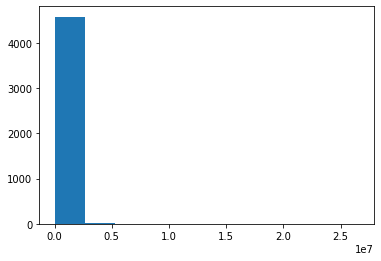

In [474]:
plt.hist(df["price"])

In [475]:
df["price"].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

Есть немного очень дорогих домов и очень дешевых домов. Сначала уберём те дома, которые стоят 0. Затем уберём некоторый процент дорогих и дешевых домов.

In [482]:
updated_df = df[df["price"] != 0]

In [483]:
updated_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [484]:
mean_price = updated_df["price"].mean()
std_price = updated_df["price"].std()
print(mean_price)
print(std_price)

557905.8991379443
563929.8712791878


In [485]:
upper_bound = updated_df["price"].quantile(0.9)
lower_bound = updated_df["price"].quantile(0.1)
print(round(upper_bound))
print(round(lower_bound))

905000
245000


In [486]:
updated_df = updated_df[updated_df["price"] < upper_bound]
updated_df = updated_df[updated_df["price"] > lower_bound]

(array([554., 541., 549., 480., 418., 326., 274., 207., 155., 133.]),
 array([245100., 310790., 376480., 442170., 507860., 573550., 639240.,
        704930., 770620., 836310., 902000.]),
 <a list of 10 Patch objects>)

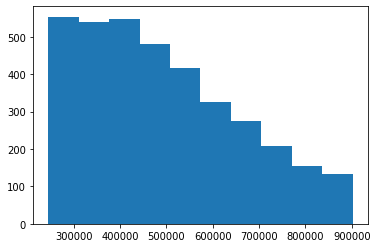

In [487]:
plt.hist(updated_df["price"])

In [488]:
updated_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3637.000000,3637.000000,3637.000000,3637.000000,3.637000e+03,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,492719.884381,3.376409,2.132252,2046.323893,1.441738e+04,1.520071,0.002750,0.162222,3.441298,1752.720649,293.603244,1971.879021,796.665933
std,167563.194864,0.861360,0.665172,740.048581,3.669745e+04,0.544382,0.052371,0.614790,0.663507,716.128336,421.433679,29.826325,976.951864
min,245100.000000,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,351999.000000,3.000000,1.750000,1500.000000,4.850000e+03,1.000000,0.000000,0.000000,3.000000,1200.000000,0.000000,1952.000000,0.000000
50%,465000.000000,3.000000,2.250000,1960.000000,7.410000e+03,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1977.000000,0.000000
75%,605000.000000,4.000000,2.500000,2500.000000,1.046600e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,600.000000,1998.000000,1999.000000
max,902000.000000,9.000000,5.750000,5960.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5010.000000,2300.000000,2014.000000,2014.000000


Будем рассматривать только численные характеристики

In [489]:
data = updated_df.iloc[:,2:14]
targets = updated_df.iloc[:,1]

Распределение характеристик

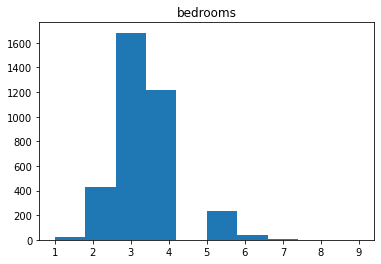

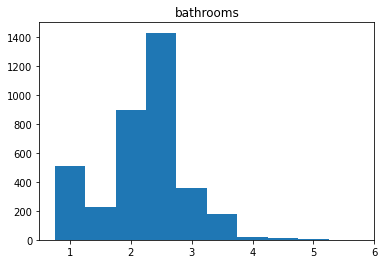

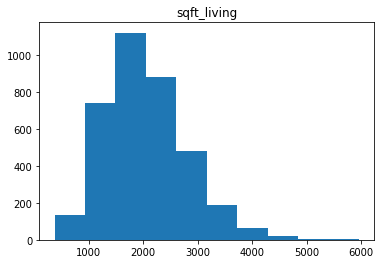

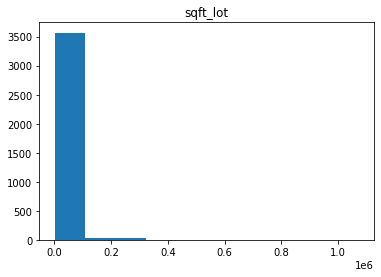

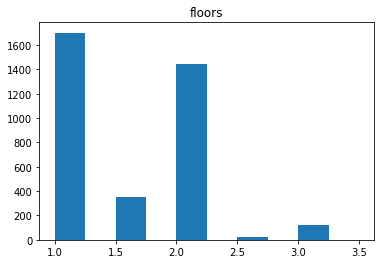

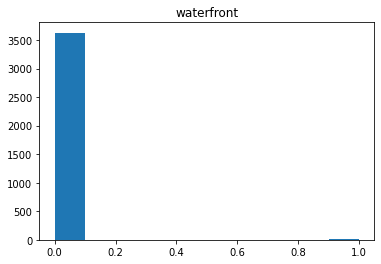

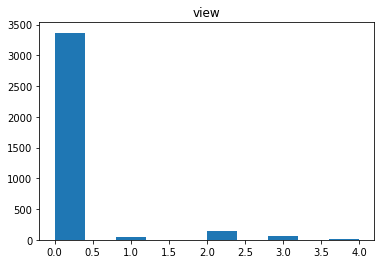

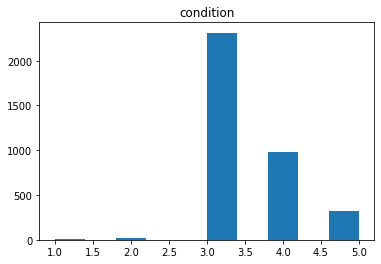

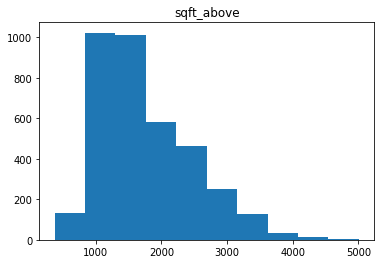

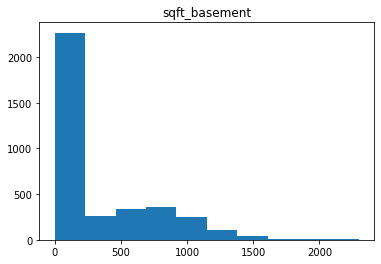

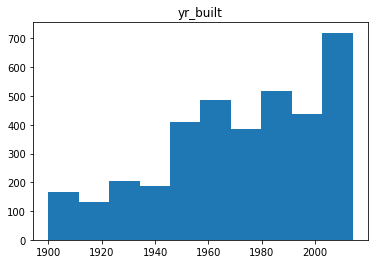

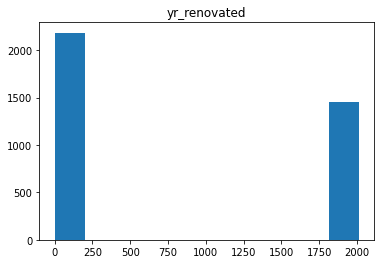

In [490]:
for col in data.columns:
  plt.hist(data[col])
  plt.title(col)
  plt.show()

In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 0 to 4597
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3637 non-null   float64
 1   bathrooms      3637 non-null   float64
 2   sqft_living    3637 non-null   int64  
 3   sqft_lot       3637 non-null   int64  
 4   floors         3637 non-null   float64
 5   waterfront     3637 non-null   int64  
 6   view           3637 non-null   int64  
 7   condition      3637 non-null   int64  
 8   sqft_above     3637 non-null   int64  
 9   sqft_basement  3637 non-null   int64  
 10  yr_built       3637 non-null   int64  
 11  yr_renovated   3637 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 369.4 KB


Берём только те, которые нормально распределены и наиболее подходят для анализа.

In [492]:
data = data[["bedrooms", "bathrooms", "sqft_living", "floors", "yr_built"]]

In [493]:
data.describe()

,bedrooms,bathrooms,sqft_living,floors,yr_built
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,3.376409,2.132252,2046.323893,1.520071,1971.879021
std,0.861360,0.665172,740.048581,0.544382,29.826325
min,1.000000,0.750000,370.000000,1.000000,1900.000000
25%,3.000000,1.750000,1500.000000,1.000000,1952.000000
50%,3.000000,2.250000,1960.000000,1.500000,1977.000000
75%,4.000000,2.500000,2500.000000,2.000000,1998.000000
max,9.000000,5.750000,5960.000000,3.500000,2014.000000


In [494]:
targets.describe()

count      3637.000000
mean     492719.884381
std      167563.194864
min      245100.000000
25%      351999.000000
50%      465000.000000
75%      605000.000000
max      902000.000000
Name: price, dtype: float64

In [495]:
print(data.shape)
print(targets.shape)

(3637, 5)
(3637,)


In [496]:
from sklearn.model_selection import train_test_split

In [497]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

Нормализуем данные.

In [498]:
mean = np.mean(X_train)
std = np.std(X_train)

X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

Используем линейную регрессию

In [499]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [500]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [501]:
print(data.columns)
print(f"Coefficients: {model1.coef_}")

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built'], dtype='object')
Coefficients: [-26680.31592516  18625.38631757 100303.72307     30390.48586856
 -55753.74026211]


In [502]:
y_pred = model1.predict(X_test)

In [503]:
print(f"Mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean squared error: 18471818932.41344
Root mean squared error: 135911.06994065436


In [504]:
# r_2 = 1 - RSS / TSS = ESS / TSS
# RSS = сумма (y_pred - y)
# TSS = сумма (y - y.mean())
# ESS = сумма (y_pred - y.mean())
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Coefficient of determination: {1 - ((y_pred - y_test) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()}")

Coefficient of determination: 0.35421667360995746
Coefficient of determination: 0.35421667360995746


Как мы видим, модель получилась не самая хорошая.

Применим глубокую нейронную сеть.


In [506]:
import keras
from keras import models, layers

In [508]:
model = models.Sequential()
model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [518]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['mse'])

In [526]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_train[:500], y_train[:500]))

Epoch 1/100
86/86 [==============================] - 0s 3ms/step - loss: -12315270316032.0000 - mse: 269727236096.0000 - val_loss: -11898671071232.0000 - val_mse: 260806279168.0000
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: -12373072019456.0000 - mse: 269727301632.0000 - val_loss: -11954644058112.0000 - val_mse: 260806279168.0000
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: -12431190392832.0000 - mse: 269727334400.0000 - val_loss: -12010900160512.0000 - val_mse: 260806279168.0000
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: -12489156722688.0000 - mse: 269727334400.0000 - val_loss: -12067198205952.0000 - val_mse: 260806279168.0000
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: -12547995467776.0000 - mse: 269727252480.0000 - val_loss: -12123649343488.0000 - val_mse: 260806279168.0000
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: -12606422122496.0000 -

In [527]:
_, mse = model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: -18804266500096.0000 - mse: 274180800512.0000


In [528]:
np.sqrt(mse)

523622.7654638404

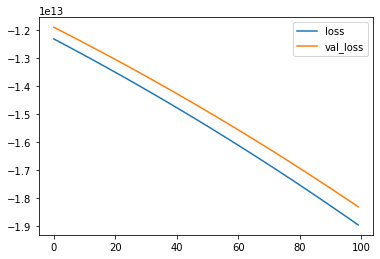

In [534]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()